In [1]:
from neural_implementation import neural_classification as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 250
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [4]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

N = df.shape[0]
print(f'Velicina skupa podataka: {N}')

Velicina skupa podataka: 250


In [5]:
classes = df['variety'].unique()
n_classes = len(classes)

print(f'Klase: {classes}')
print(f'Broj klasa: {n_classes}\n')

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Klase: ['Setosa' 'Versicolor' 'Virginica' 'Letosa' 'Helenica']
Broj klasa: 5

Mapiranje imena klasa u numericke vrednosti:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica


In [6]:
mapper_cls_to_vec = {}
for i in range(n_classes):
    vec = np.zeros((n_classes,))
    vec[i] = 1
    
    mapper_cls_to_vec[i] = vec
    
print('Mapiranje numericke vrednosti u odgovarajuci vektor:')
for cls, vec in mapper_cls_to_vec.items():
    print(f'{cls} -> {vec}')

Mapiranje numericke vrednosti u odgovarajuci vektor:
0 -> [1. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0.]
3 -> [0. 0. 0. 1. 0.]
4 -> [0. 0. 0. 0. 1.]


In [7]:
y_tmp = df['variety']

y = np.zeros((N, n_classes))
for i in range(N):
    cls = name_to_class_dict[y_tmp[i]]
    y[i] = mapper_cls_to_vec[cls]

In [8]:
X = np.ones((N, 2*m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]
X[:, 3] = df[attr1]**2
X[:, 4] = df[attr2]**2

In [9]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.   1.4  0.2  1.96 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.3  0.2  1.69 0.04]
 [1.   1.5  0.2  2.25 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.7  0.4  2.89 0.16]
 [1.   1.4  0.3  1.96 0.09]
 [1.   1.5  0.2  2.25 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.5  0.1  2.25 0.01]]
 ...
Ciljne promenljive:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.33, 
                                                    random_state=5)

In [11]:
print(f'X_train:')
print(X_train[:10])
print(' ...')
print()

print(f'y_train:')
print(y_train[:10])
print(' ...')
print()

print(f'X_test:')
print(X_test[:10])
print(' ...')
print()

print(f'y_test:')
print(y_test[:10])
print(' ...')

X_train:
[[ 1.    5.2   2.   27.04  4.  ]
 [ 1.    4.9   0.9  24.01  0.81]
 [ 1.    5.9   0.6  34.81  0.36]
 [ 1.    3.8   1.1  14.44  1.21]
 [ 1.    1.4   0.2   1.96  0.04]
 [ 1.    6.1   1.1  37.21  1.21]
 [ 1.    4.1   1.3  16.81  1.69]
 [ 1.    2.2   1.4   4.84  1.96]
 [ 1.    1.3   0.3   1.69  0.09]
 [ 1.    2.7   1.7   7.29  2.89]]
 ...

y_train:
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
 ...

X_test:
[[1.000e+00 5.100e+00 9.000e-01 2.601e+01 8.100e-01]
 [1.000e+00 2.400e+00 1.800e+00 5.760e+00 3.240e+00]
 [1.000e+00 1.300e+00 3.000e-01 1.690e+00 9.000e-02]
 [1.000e+00 3.000e+00 1.900e+00 9.000e+00 3.610e+00]
 [1.000e+00 6.000e+00 1.000e+00 3.600e+01 1.000e+00]
 [1.000e+00 4.100e+00 1.300e+00 1.681e+01 1.690e+00]
 [1.000e+00 6.700e+00 2.000e+00 4.489e+01 4.000e+00]
 [1.000e+00 1.200e+00 2.000e-01 1.440e+00 4.000e-02]
 [1.000e+00 5.100e+00 1.50

In [12]:
nn = nc.NeuralNetwork(2*m, [2*m, 2*m, 2*m], n_classes)

nn.print_network()
print()

nn.print_layer_mapper_sizes()
print()

nn.initialize_model()
print('Initial model:')
nn.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]
Layer 4:
[1. 1. 1. 1. 1.]
Layer 5:
[1. 1. 1. 1. 1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 4 x 5
1 -> 2: 4 x 5
2 -> 3: 4 x 5
3 -> 4: 5 x 5

Initial model:
Model:
W_0: 0 -> 1, shape: (4, 5)
[[ 0.09724326  0.00313403  0.03012076  0.05385149 -0.09400902]
 [-0.02447247  0.03508668  0.04568655 -0.06889132 -0.00223211]
 [-0.0353506   0.06109542  0.03333439 -0.03868124 -0.00356919]
 [ 0.06259848  0.06146069 -0.06577454 -0.05369304 -0.03760803]]
W_1: 1 -> 2, shape: (4, 5)
[[ 0.08804868 -0.02527359  0.01047994 -0.06453203 -0.00260519]
 [-0.08509343 -0.01025038  0.00098888 -0.0399535  -0.02998145]
 [ 0.04589767 -0.04328667  0.07062726 -0.08541407 -0.05010815]
 [ 0.00652475  0.01818935 -0.08531794  0.01355074  0.05360365]]
W_2: 2 -> 3, shape: (4, 5)
[[ 0.04439287  0.08930407  0.02328766  0.09657157  0.03803016]
 [-0.08585355 -0.0117824  -0.02148425  0.09179335  0.09590789]
 [-0.04864

In [13]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(7)]
print('lamda parameters:')
print(lambdas)

lamda parameters:
[0, 0.01, 0.015, 0.0225, 0.03375, 0.050625, 0.0759375, 0.11390625]


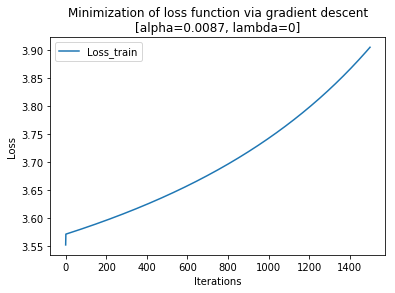

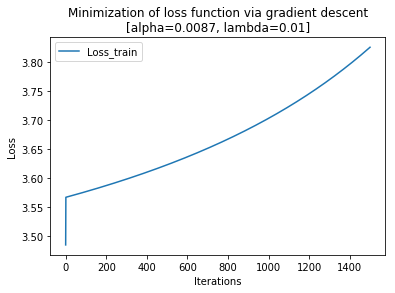

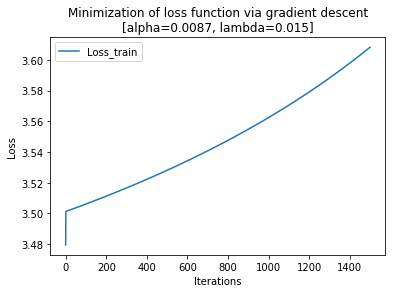

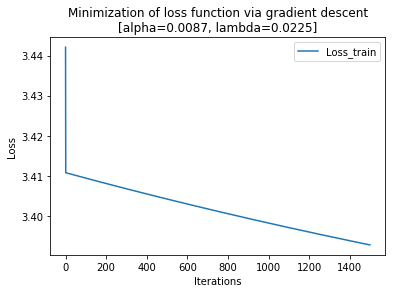

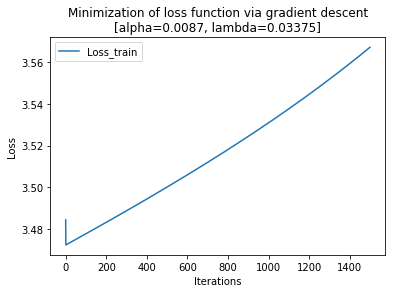

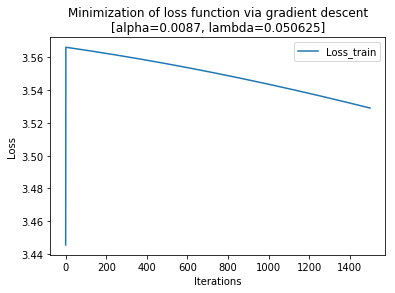

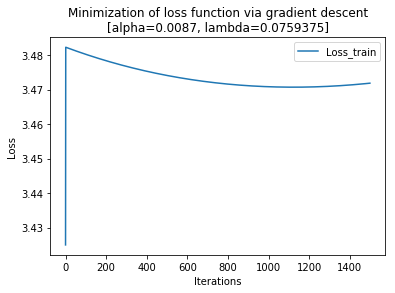

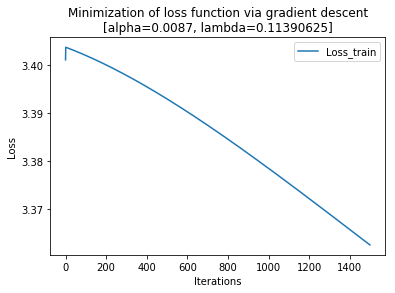

In [14]:
classifiers = [nn.fit(X_train, 
                      y_train, 
                      alpha=0.0087, 
                      lambda_param=lambda_param,
                      num_iter=1500,
                      plot=True,
                      gc_it=300,
                      gc_log_path='./gc_log.txt') 
               for lambda_param in lambdas]

In [15]:
losses_test = [clf.loss(X_test, y_test) for clf in classifiers]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
for i, loss in enumerate(losses_test):
    print(f'Klasifikator {i + 1}: Loss = {loss}')

Funkcije gubitka za svaki klasifikator posebno na test skupu:
Klasifikator 1: Loss = 3.915150648707183
Klasifikator 2: Loss = 3.8317616005712227
Klasifikator 3: Loss = 3.612328993021773
Klasifikator 4: Loss = 3.3930026516744674
Klasifikator 5: Loss = 3.5703545581680642
Klasifikator 6: Loss = 3.5281121748257545
Klasifikator 7: Loss = 3.4736058846197873
Klasifikator 8: Loss = 3.3591277433355335


In [17]:
min_loss = float('inf')
best_clf = None

for i, loss in enumerate(losses_test):
    if loss < min_loss:
        min_loss = loss
        best_clf = classifiers[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}')
print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: '
      f'{best_clf.lambda_learned}')      
print('Model najboljeg klasifikatora:')

best_clf.print_model()

Najmanji gubitak (na test skupu) za svaki klasifikator: 3.3591277433355335
Regularizacioni parametar lambda za koji je naucen najbolji model: 0.11390625
Model najboljeg klasifikatora:
Model:
W_0: 0 -> 1
[[ 0.01636764  0.00308185 -0.0034898   0.02257312  0.01385121]
 [-0.09886214 -0.00493161  0.02076081  0.01236197 -0.00845024]
 [-0.05108089  0.01238709 -0.02141259 -0.01788463  0.00370351]
 [-0.03341136  0.02252501 -0.01846615  0.01373757 -0.0047752 ]]
W_1: 1 -> 2
[[-0.03870252  0.00394654  0.00032107 -0.01197823  0.00773556]
 [ 0.03544771 -0.01283136  0.01946448 -0.02096401  0.01198141]
 [-0.03439352 -0.00461853 -0.00901231 -0.0017622  -0.01822013]
 [-0.03210047  0.0076878  -0.01171956 -0.01870079  0.0150762 ]]
W_2: 2 -> 3
[[-0.03870252  0.00394654  0.00032107 -0.01197823  0.00773556]
 [ 0.03544771 -0.01283136  0.01946448 -0.02096401  0.01198141]
 [-0.03439352 -0.00461853 -0.00901231 -0.0017622  -0.01822013]
 [-0.03210047  0.0076878  -0.01171956 -0.01870079  0.0150762 ]]
W_3: 3 -> 4
[[

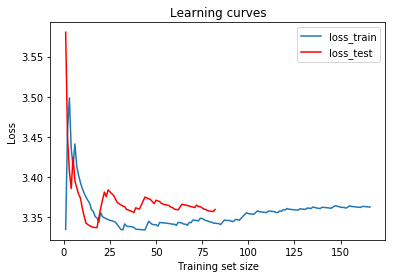

In [18]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf)

Ponovno iscrtavanje skupa podataka pred testiranje:


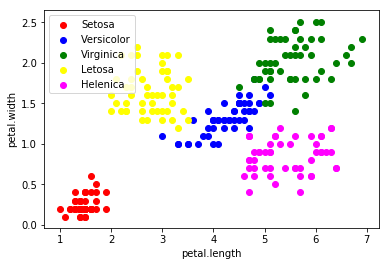

In [19]:
print('Ponovno iscrtavanje skupa podataka pred testiranje:')

colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)

plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [20]:
x1 = np.array([1, 0.5, 0.4, 0.5**2, 0.4**2]) # Setosa
x2 = np.array([1, 4.2, 1.2, 4.2**2, 1.2**2]) # Versicolor
x3 = np.array([1, 5.5, 2, 5.5**2, 2**2]) # Virginca
x4 = np.array([1, 2.9, 1.9, 2.9**2, 1.9**2]) # Letosa
x5 = np.array([1, 5.2, 0.8, 5.2**2, 0.8**2]) # Helenica

In [21]:
y_predict1 = best_clf.predict(x1)
y_predict2 = best_clf.predict(x2)
y_predict3 = best_clf.predict(x3)
y_predict4 = best_clf.predict(x4)
y_predict5 = best_clf.predict(x5)

print('~ TESTIRANJE KLASIFIKATORA ~')

print('Test 1:')
nc.Classifier.prediction_info(y_predict1, class_to_name_dict)
print()

print('Test 2:')
nc.Classifier.prediction_info(y_predict2, class_to_name_dict)
print()

print('Test 3:')
nc.Classifier.prediction_info(y_predict3, class_to_name_dict)
print()

print('Test 4:')
nc.Classifier.prediction_info(y_predict4, class_to_name_dict)
print()

print('Test 5:')
nc.Classifier.prediction_info(y_predict5, class_to_name_dict)
print() 

~ TESTIRANJE KLASIFIKATORA ~
Test 1:
Prediction vector: [0.49034066 0.50868051 0.48724095 0.49100055 0.42644254]
Max prediction value: 0.5086805101693059 (at position 1)
Class: Versicolor

Test 2:
Prediction vector: [0.49034069 0.50868056 0.48724091 0.49100058 0.4264424 ]
Max prediction value: 0.5086805635827548 (at position 1)
Class: Versicolor

Test 3:
Prediction vector: [0.4903407  0.5086806  0.48724089 0.4910006  0.42644232]
Max prediction value: 0.5086805985912396 (at position 1)
Class: Versicolor

Test 4:
Prediction vector: [0.49034067 0.50868053 0.48724093 0.49100057 0.42644247]
Max prediction value: 0.5086805342219652 (at position 1)
Class: Versicolor

Test 5:
Prediction vector: [0.4903407  0.50868059 0.4872409  0.49100059 0.42644234]
Max prediction value: 0.5086805915407931 (at position 1)
Class: Versicolor



In [22]:
nn.set_model(best_clf.model)

nn.forward_propagation(x1)
print(nn.output_layer)



[0.49034066 0.50868051 0.48724095 0.49100055 0.42644254]
